In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data Wrangling

In [2]:
Insurance_fraud = '/Users/jenniferrobbins/Downloads/InsuranceFraud.xlsx'
df = pd.read_excel(Insurance_fraud)
pd.set_option('display.max_columns', 100)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [3]:
df.shape

(11565, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [5]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mode()[0],inplace = True)
df['DriverRating'].fillna(df['DriverRating'].mode()[0],inplace = True)

In [7]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,11565.0,2.784003,1.284854,1.0,2.000000,3.000000,4.000000,5.000000
WeekOfMonthClaimed,11565.0,2.701167,1.258153,1.0,2.000000,3.000000,4.000000,5.000000
Age,11565.0,39.896585,13.588375,0.0,31.000000,38.000000,49.000000,80.000000
FraudFound_P,11565.0,0.059230,0.236066,0.0,0.000000,0.000000,0.000000,1.000000
PolicyNumber,11565.0,7710.474449,4453.762219,1.0,3851.000000,7712.000000,11542.000000,15420.000000
RepNumber,11565.0,8.469780,4.618952,1.0,4.000000,8.000000,12.000000,16.000000
Deductible,11565.0,407.617812,43.397393,300.0,400.000000,400.000000,400.000000,700.000000
DriverRating,11565.0,2.492693,1.118329,1.0,1.000000,2.000000,3.000000,4.000000
Year,11565.0,1994.865975,0.801798,1994.0,1994.000000,1995.000000,1996.000000,1996.000000
ClaimSize,11565.0,22955.978035,26988.811719,0.0,4148.845001,8130.994563,46299.646944,141394.159289


### Observations
#### - All features except for ClaimSize have a mean almost equal to the median, suggesting the data is normally distributed.
#### - ClaimSize has a median value almost three times smaller than the mean. This suggests a is positively skewed distribution.

#### 


### Below shows a summary the non-numeric features 

In [9]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
Month,11565,12,Jan,1056
DayOfWeek,11565,7,Monday,2000
Make,11565,19,Pontiac,2899
AccidentArea,11565,2,Urban,10356
DayOfWeekClaimed,11565,8,Monday,2811
MonthClaimed,11565,13,Jan,1084
Sex,11565,2,Male,9768
MaritalStatus,11565,4,Married,7986
Fault,11565,2,Policy Holder,8394
PolicyType,11565,9,Sedan - Collision,4186


# Exploratory Data Analysis

### Distributions on each of the numeric features in the data set 

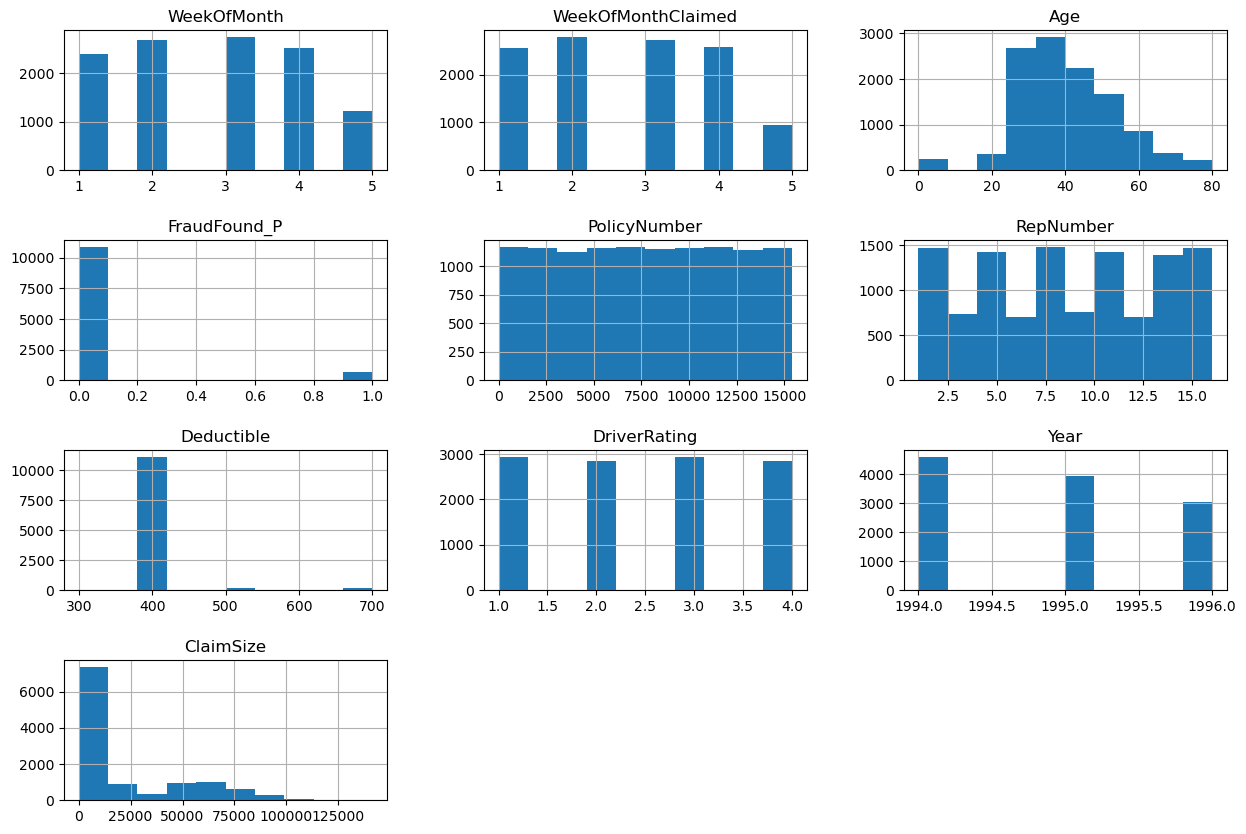

In [10]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

### Number of fraudulent claims 

In [11]:
def cross_tab(x,y):
    crtab = pd.crosstab(df[x], df[y])
    return crtab

0    10880
1      685
Name: FraudFound_P, dtype: int64


<AxesSubplot:>

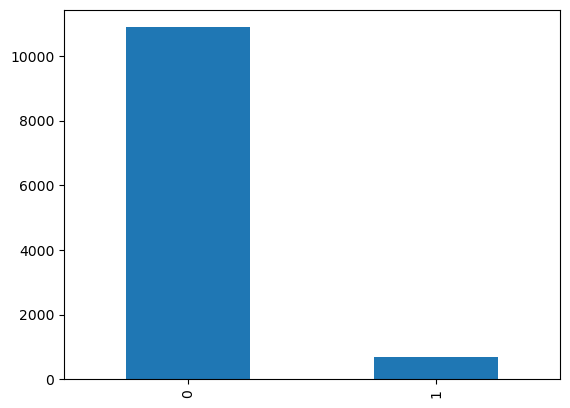

In [12]:
p = df['FraudFound_P'].value_counts()
print(p)
df['FraudFound_P'].value_counts().plot.bar()

#### I decided to take a closer look at fraud and no fraud claims with the Age and ClaimSize features, since they resulted in interesting distribtions.

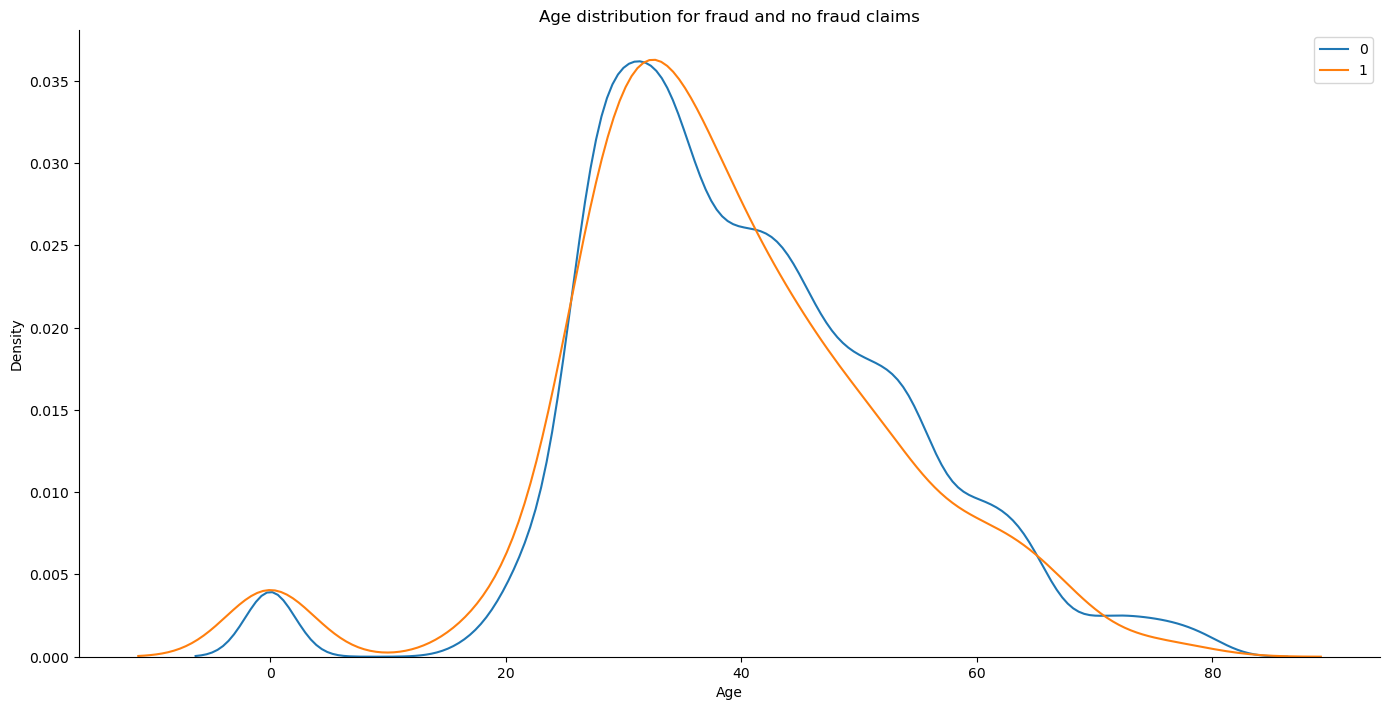

In [13]:
g = sns.FacetGrid(df, hue='FraudFound_P', height = 7, aspect = 2)
g.map(sns.kdeplot, 'Age')
plt.title('Age distribution for fraud and no fraud claims')
plt.legend()
plt.show()

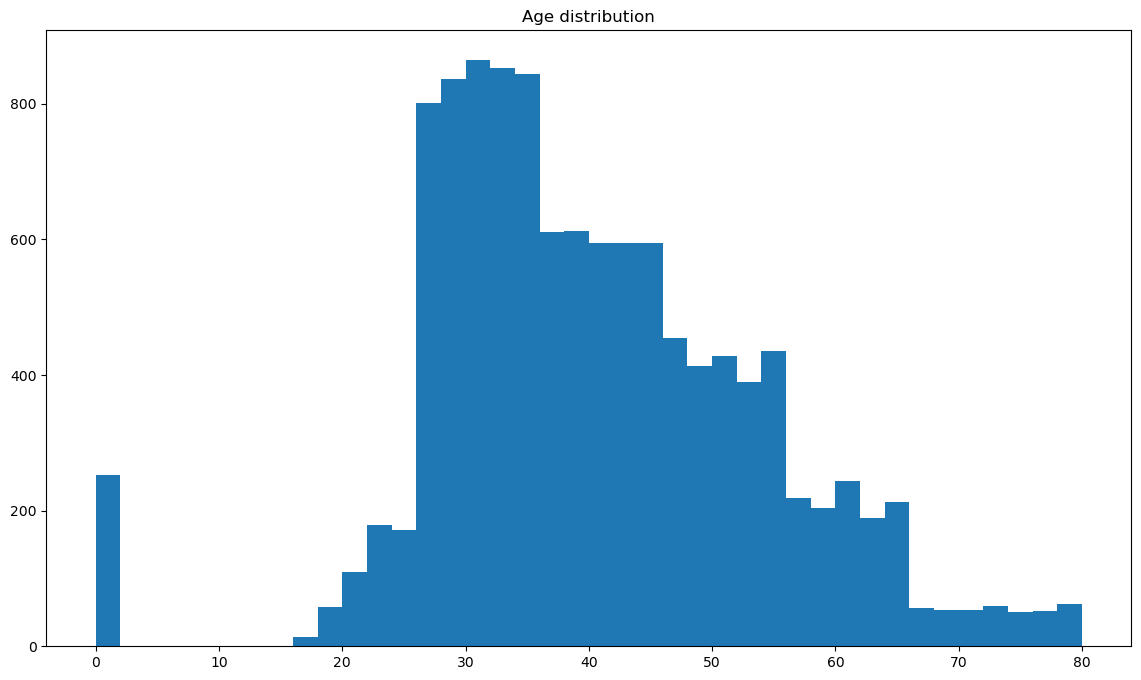

In [14]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['Age'], bins = 40)    #, bins = 'fd')
plt.title('Age distribution')
plt.show()

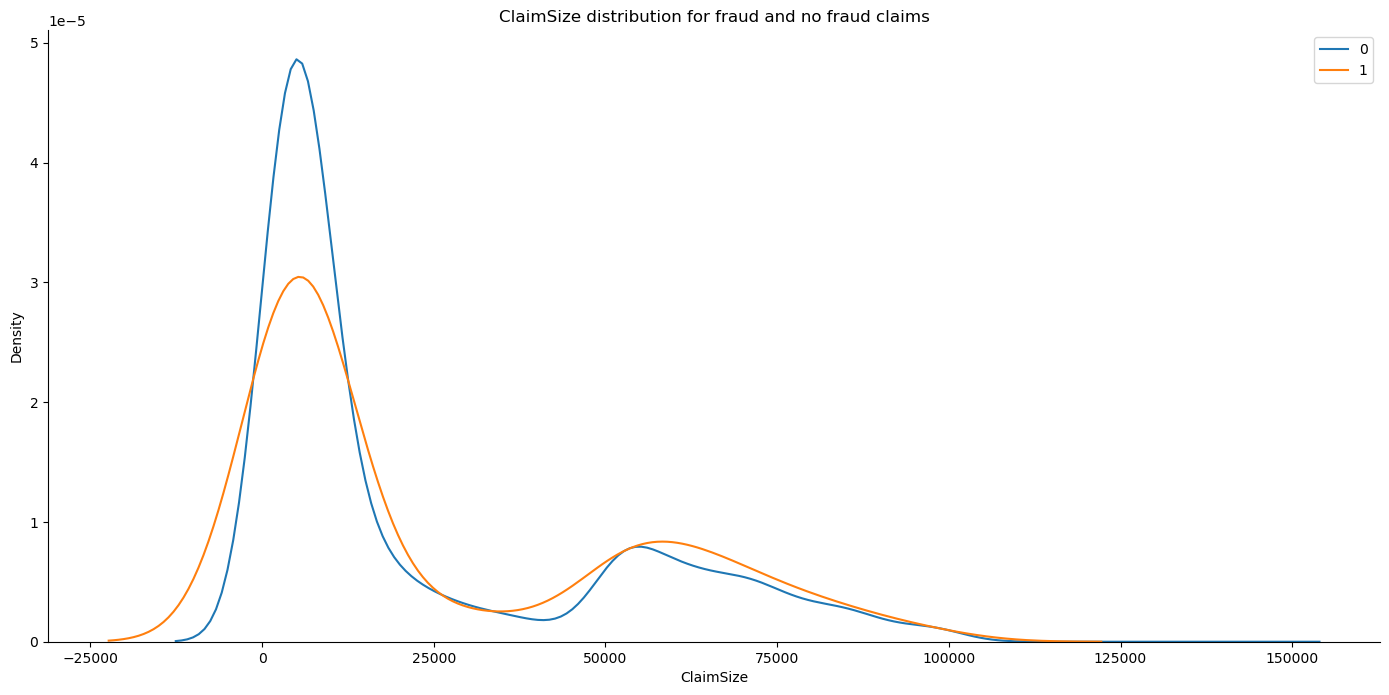

In [15]:
g = sns.FacetGrid(df, hue='FraudFound_P', height = 7, aspect = 2)
g.map(sns.kdeplot, 'ClaimSize')
plt.title('ClaimSize distribution for fraud and no fraud claims')
plt.legend()
plt.show()

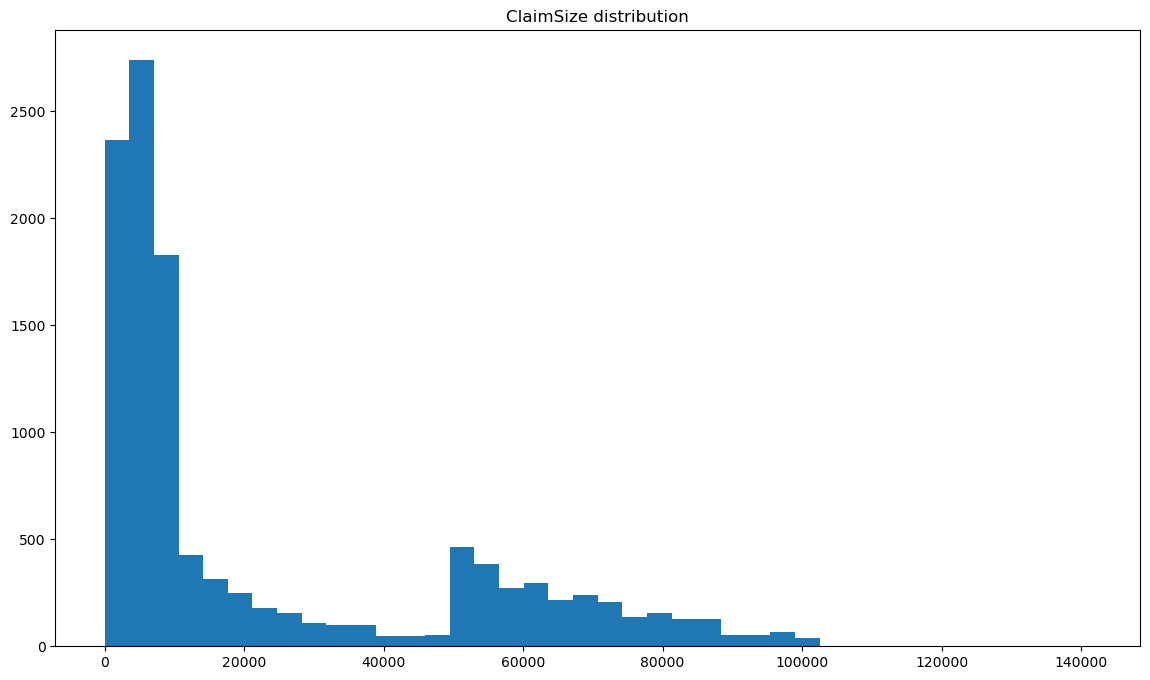

In [16]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['ClaimSize'], bins = 40)    
plt.title('ClaimSize distribution')
plt.show()

### Below are tables of fraud rates for each non-numeric feature

In [17]:
fraud_rate_make = df.groupby('Make').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_make.columns = ['FraudRate', '#']
fraud_rate_make = fraud_rate_make.apply(lambda x: round(x, 3))
fraud_rate_make.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Make,,
Mecedes,0.333,3
Accura,0.127,354
Saturn,0.098,41
Saab,0.086,70
Ford,0.074,338
Honda,0.062,2159
Toyota,0.061,2317
Chevrolet,0.060,1253
Mercury,0.059,68


In [18]:
fraud_rate_area = df.groupby('AccidentArea').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_area.columns = ['FraudRate', '#']
fraud_rate_area = fraud_rate_area.apply(lambda x: round(x, 3))
fraud_rate_area.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AccidentArea,,
Rural,0.081,1209
Urban,0.057,10356


In [19]:
cross_tab('AccidentArea', 'FraudFound_P')

FraudFound_P,0,1
AccidentArea,,
Rural,1111,98
Urban,9769,587


In [20]:
fraud_rate_gender = df.groupby('Sex').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_gender.columns = ['FraudRate', '#']
fraud_rate_gender = fraud_rate_gender.apply(lambda x: round(x, 3))
fraud_rate_gender.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Sex,,
Male,0.063,9768
Female,0.041,1797


In [21]:
cross_tab('Sex','FraudFound_P')

FraudFound_P,0,1
Sex,,
Female,1724,73
Male,9156,612


In [22]:
fraud_rate_status = df.groupby('MaritalStatus').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_status.columns = ['FraudRate', '#']
fraud_rate_status = fraud_rate_status.apply(lambda x: round(x, 3))
fraud_rate_status.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
MaritalStatus,,
Widow,0.095,21
Married,0.060,7986
Single,0.057,3497
Divorced,0.049,61


In [23]:
fraud_rate_policy = df.groupby('PolicyType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_policy.columns = ['FraudRate', '#']
fraud_rate_policy = fraud_rate_policy.apply(lambda x: round(x, 3))
fraud_rate_policy.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PolicyType,,
Utility - All Perils,0.131,251
Sport - Collision,0.130,262
Utility - Collision,0.125,24
Sedan - All Perils,0.100,3067
Sedan - Collision,0.067,4186
Sedan - Liability,0.007,3742
Sport - All Perils,0.000,19
Sport - Liability,0.000,1
Utility - Liability,0.000,13


In [24]:
fraud_rate_fault = df.groupby('Fault').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_fault.columns = ['FraudRate', '#']
fraud_rate_fault = fraud_rate_fault.apply(lambda x: round(x, 3))
fraud_rate_fault.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Fault,,
Policy Holder,0.078,8394
Third Party,0.009,3171


In [25]:
cross_tab('Fault', 'FraudFound_P')

FraudFound_P,0,1
Fault,,
Policy Holder,7737,657
Third Party,3143,28


In [26]:
fraud_rate_cat = df.groupby('VehicleCategory').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_cat.columns = ['FraudRate', '#']
fraud_rate_cat = fraud_rate_cat.apply(lambda x: round(x, 3))
fraud_rate_cat.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
VehicleCategory,,
Utility,0.125,288
Sedan,0.081,7253
Sport,0.015,4024


In [27]:
fraud_rate_price = df.groupby('VehiclePrice').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_price.columns = ['FraudRate', '#']
fraud_rate_price = fraud_rate_price.apply(lambda x: round(x, 3))
fraud_rate_price.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
VehiclePrice,,
more than 69000,0.088,1605
less than 20000,0.082,800
40000 to 59000,0.060,349
20000 to 29000,0.054,6112
60000 to 69000,0.051,59
30000 to 39000,0.047,2640


In [28]:
fraud_rate_pastclaims = df.groupby('PastNumberOfClaims').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_pastclaims.columns = ['FraudRate', '#']
fraud_rate_pastclaims = fraud_rate_pastclaims.apply(lambda x: round(x, 3))
fraud_rate_pastclaims.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PastNumberOfClaims,,
none,0.079,3286
1,0.062,2675
2 to 4,0.050,4140
more than 4,0.036,1464


In [29]:
fraud_rate_carage = df.groupby('AgeOfVehicle').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_carage.columns = ['FraudRate', '#']
fraud_rate_carage = fraud_rate_carage.apply(lambda x: round(x, 3))
fraud_rate_carage.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AgeOfVehicle,,
new,0.091,285
3 years,0.090,100
4 years,0.085,176
6 years,0.064,2581
5 years,0.061,990
7 years,0.059,4388
more than 7,0.049,2993
2 years,0.038,52


In [30]:
fraud_rate_rep_wit = df.groupby(['PoliceReportFiled', 'WitnessPresent']).agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_rep_wit.columns = ['FraudRate', '#']
fraud_rate_rep_wit = fraud_rate_rep_wit.apply(lambda x: round(x, 3))
fraud_rate_rep_wit.sort_values(by='FraudRate',ascending=False)

FraudRate      #
PoliceReportFiled WitnessPresent                  
No                No                  0.060  11193
                  Yes                 0.048     42
Yes               No                  0.043    304
                  Yes                 0.000     26

In [31]:
fraud_rate_agent = df.groupby('AgentType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_agent.columns = ['FraudRate', '#']
fraud_rate_agent = fraud_rate_agent.apply(lambda x: round(x, 3))
fraud_rate_agent.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AgentType,,
External,0.060,11394
Internal,0.023,171


In [32]:
fraud_rate_cars = df.groupby('NumberOfCars').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_cars.columns = ['FraudRate', '#']
fraud_rate_cars = fraud_rate_cars.apply(lambda x: round(x, 3))
fraud_rate_cars.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
NumberOfCars,,
2 vehicles,0.066,559
3 to 4,0.066,288
1 vehicle,0.059,10698
5 to 8,0.053,19
more than 8,0.000,1


In [33]:
fraud_rate_bpolicy = df.groupby('BasePolicy').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_bpolicy.columns = ['FraudRate', '#']
fraud_rate_bpolicy = fraud_rate_bpolicy.apply(lambda x: round(x, 3))
fraud_rate_bpolicy.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
BasePolicy,,
All Perils,0.102,3337
Collision,0.071,4472
Liability,0.007,3756


#### Outlier Analysis

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'WeekOfMonth'),
  Text(2, 0, 'WeekOfMonthClaimed'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'FraudFound_P'),
  Text(5, 0, 'PolicyNumber'),
  Text(6, 0, 'RepNumber'),
  Text(7, 0, 'Deductible'),
  Text(8, 0, 'DriverRating'),
  Text(9, 0, 'Year'),
  Text(10, 0, 'ClaimSize')])

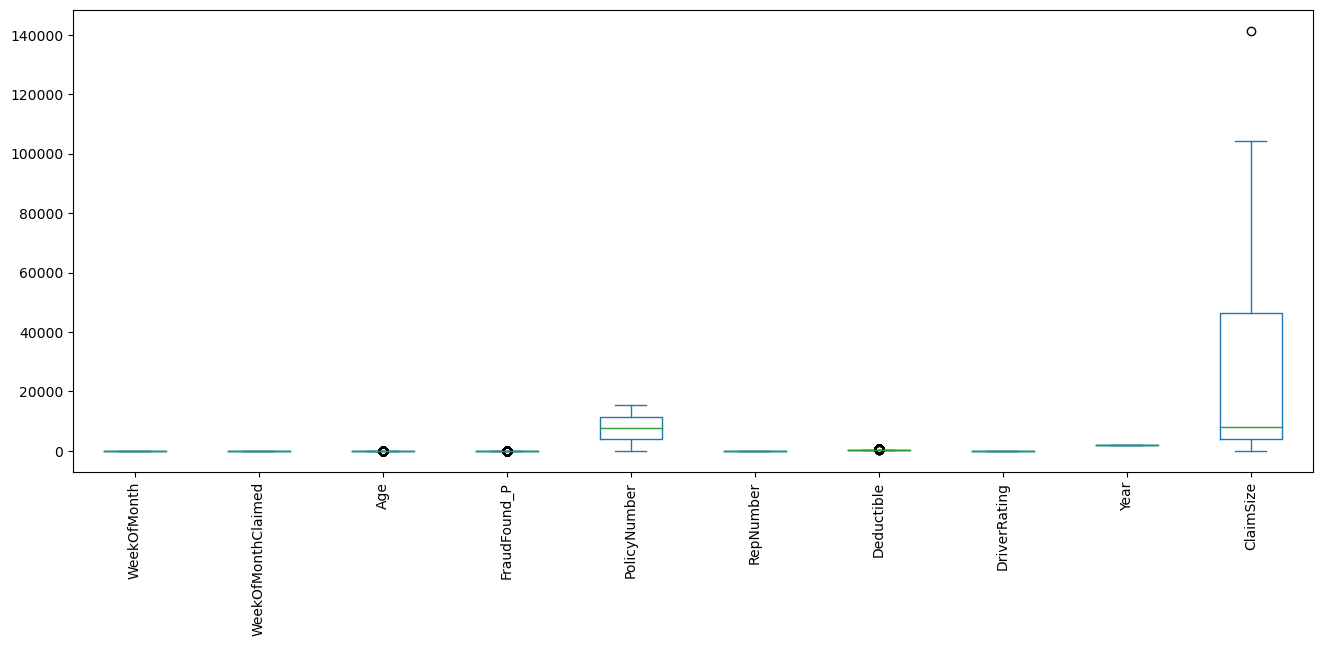

In [34]:
df.plot.box(figsize = (16,6), showfliers=True)
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Correlation matrix for numerical features')

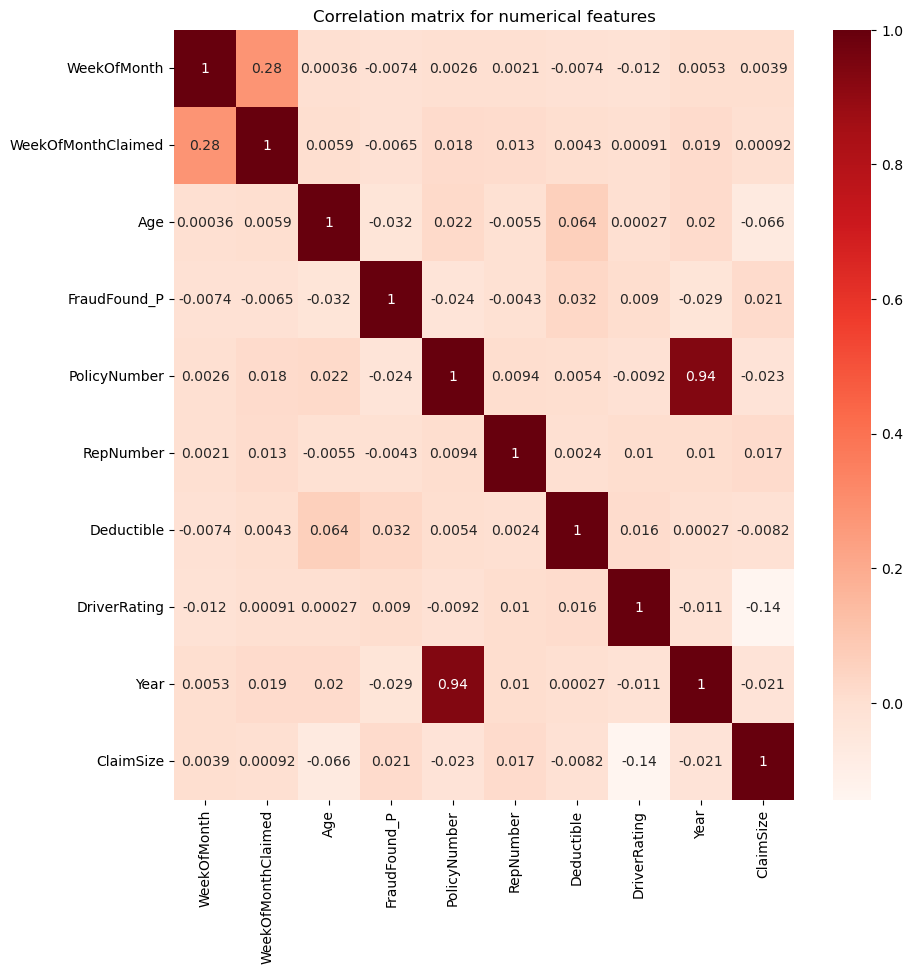

In [35]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.title('Correlation matrix for numerical features')

# Pre-Processing and Training Data Development

In [36]:
df_copy = df.copy()

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11565 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [38]:
months = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Apr' : 4,
    'May' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Aug' : 8,
    'Sep' : 9, 
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
          }
months_proc = lambda x: months.get(x, 0)

df_copy['Month'] = df_copy['Month'].apply(months_proc)
df_copy['MonthClaimed'] = df_copy['MonthClaimed'].apply(months_proc)

In [39]:
days_of_week = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
          }
days_of_week_proc = lambda x: days_of_week.get(x, 0)

df_copy['DayOfWeek'] = df_copy['DayOfWeek'].apply(days_of_week_proc)
df_copy['DayOfWeekClaimed'] = df_copy['DayOfWeekClaimed'].apply(days_of_week_proc)

In [40]:
vehicle_price = {
    'less than 20000': 1,
    '20000 to 29000' : 2,
    '30000 to 39000' : 3,
    '40000 to 59000' : 4,
    '60000 to 69000' : 5,
    'more than 69000': 6,
          }
vehicle_price_proc = lambda x: vehicle_price.get(x, 0)

df_copy['VehiclePrice'] = df_copy['VehiclePrice'].apply(vehicle_price_proc)

In [41]:
vehicle_age = {
    'new'         : 0.5,
    '2 years'     : 2,
    '3 years'     : 3,
    '4 years'     : 4,
    '5 years'     : 5,
    '6 years'     : 6,
    '7 years'     : 7,
    'more than 7' : 8.5,
          }
vehicle_age_proc = lambda x: vehicle_age[x]

df_copy['AgeOfVehicle'] = df_copy['AgeOfVehicle'].apply(vehicle_age_proc)

In [42]:
age_variants = {
    '16 to 17'     : 1,
    '18 to 20'     : 2,
    '21 to 25'     : 3,
    '26 to 30'     : 4,
    '31 to 35'     : 5,
    '36 to 40'     : 6,
    '41 to 50'     : 7,
    '51 to 65'     : 8,
    'over 65'      : 9,
          }
age_proc = lambda x: age_variants[x]

df_copy['AgeOfPolicyHolder'] = df_copy['AgeOfPolicyHolder'].apply(age_proc)

In [43]:
df_copy['Age'] = df_copy['Age'].fillna(0)
df_copy['DriverRating'] = df_copy['DriverRating'].fillna(0)

In [44]:
df_copy[df_copy.isnull().any(axis=1)]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize


In [45]:
df_copy.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,3,Honda,Urban,2,1,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,6,0,1,12,300,1.0,more than 30,more than 30,none,3.0,4,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,1,3,3,Honda,Urban,1,1,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,6,0,2,15,400,4.0,more than 30,more than 30,none,6.0,5,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,10,5,5,Honda,Urban,4,11,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,6,0,3,7,400,3.0,more than 30,more than 30,1,7.0,7,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,2,0,4,4,400,2.0,more than 30,more than 30,1,8.5,8,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,2,1,6,Honda,Urban,1,2,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,6,0,7,14,400,1.0,more than 30,more than 30,1,7.0,6,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [46]:
def dummification(df):
    dummy_df = pd.DataFrame()
    object_cols = df.columns[df.dtypes == object]
    for col in object_cols:
        dummy_df = pd.concat([dummy_df, create_dummy(col, df)], axis = 1)
    
    df_out = pd.concat([df.drop(columns = object_cols), dummy_df], axis = 1)
    return df_out.sort_index(ascending=False, axis=1)
        

def create_dummy(col, df):
    df_dummy = pd.get_dummies(df[col], drop_first = True)
    df_dummy.columns = ['dum: ' + str(col) + ': ' + str(name) for name in df_dummy.columns]
    return df_dummy

df_copy = dummification(df_copy)
df_copy.head()

,dum: WitnessPresent: Yes,dum: VehicleCategory: Utility,dum: VehicleCategory: Sport,dum: Sex: Male,dum: PolicyType: Utility - Liability,dum: PolicyType: Utility - Collision,dum: PolicyType: Utility - All Perils,dum: PolicyType: Sport - Liability,dum: PolicyType: Sport - Collision,dum: PolicyType: Sport - All Perils,dum: PolicyType: Sedan - Liability,dum: PolicyType: Sedan - Collision,dum: PoliceReportFiled: Yes,dum: PastNumberOfClaims: none,dum: PastNumberOfClaims: more than 4,dum: PastNumberOfClaims: 2 to 4,dum: NumberOfSuppliments: none,dum: NumberOfSuppliments: more than 5,dum: NumberOfSuppliments: 3 to 5,dum: NumberOfCars: more than 8,dum: NumberOfCars: 5 to 8,dum: NumberOfCars: 3 to 4,dum: NumberOfCars: 2 vehicles,dum: MaritalStatus: Widow,dum: MaritalStatus: Single,dum: MaritalStatus: Married,dum: Make: VW,dum: Make: Toyota,dum: Make: Saturn,dum: Make: Saab,dum: Make: Porche,dum: Make: Pontiac,dum: Make: Nisson,dum: Make: Mercury,dum: Make: Mecedes,dum: Make: Mazda,dum: Make: Lexus,dum: Make: Jaguar,dum: Make: Honda,dum: Make: Ford,dum: Make: Ferrari,dum: Make: Dodge,dum: Make: Chevrolet,dum: Make: BMW,dum: Fault: Third Party,dum: Days_Policy_Claim: none,dum: Days_Policy_Claim: more than 30,dum: Days_Policy_Claim: 8 to 15,dum: Days_Policy_Accident: none,dum: Days_Policy_Accident: more than 30,dum: Days_Policy_Accident: 8 to 15,dum: Days_Policy_Accident: 15 to 30,dum: BasePolicy: Liability,dum: BasePolicy: Collision,dum: AgentType: Internal,dum: AddressChange_Claim: under 6 months,dum: AddressChange_Claim: no change,dum: AddressChange_Claim: 4 to 8 years,dum: AddressChange_Claim: 2 to 3 years,dum: AccidentArea: Urban,Year,WeekOfMonthClaimed,WeekOfMonth,VehiclePrice,RepNumber,PolicyNumber,MonthClaimed,Month,FraudFound_P,DriverRating,Deductible,DayOfWeekClaimed,DayOfWeek,ClaimSize,AgeOfVehicle,AgeOfPolicyHolder,Age
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1994,1,5,6,12,1,1,12,0,1.0,300,2,3,55526.069421,3.0,4,21.0
1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1994,4,3,6,15,2,1,1,0,4.0,400,1,3,59294.455571,6.0,5,34.0
2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1994,2,5,6,7,3,11,10,0,3.0,400,4,5,71756.941320,7.0,7,47.0
3,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1994,1,2,2,4,4,7,6,0,2.0,400,5,6,7584.153493,8.5,8,65.0
4,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1994,3,1,6,14,7,2,2,0,1.0,400,1,6,98545.374339,7.0,6,36.0


# Modeling

### Hypothesis
#### H0 : Given data is fraudulent
#### H1 : Given data is genuine

In [47]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD, NMF, KernelPCA
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import umap
import warnings
from sklearn.cluster import KMeans, MeanShift, DBSCAN
warnings.filterwarnings('ignore')

In [48]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(df_copy.drop('FraudFound_P', axis=1))
y_scaler = df['FraudFound_P'].values

In [49]:
pca = PCA(n_components=2, random_state = 1)
df_pca = pca.fit_transform(X_scaler)

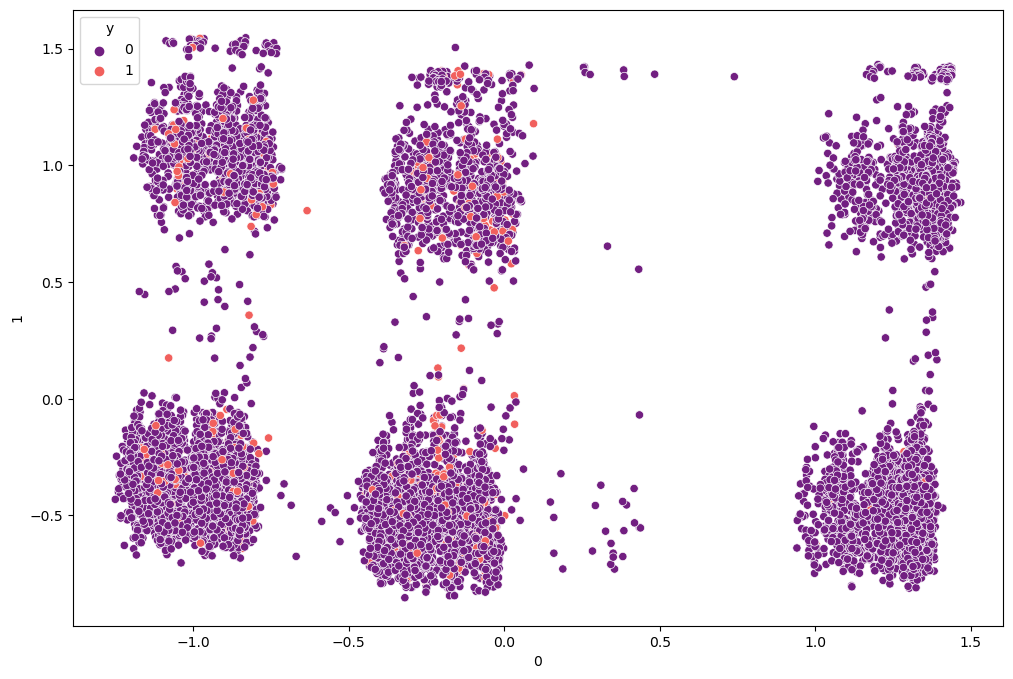

In [50]:
df_vis = pd.DataFrame(df_pca)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

In [51]:
svd = TruncatedSVD(n_components=2, random_state = 1)
df_svd = svd.fit_transform(X_scaler)

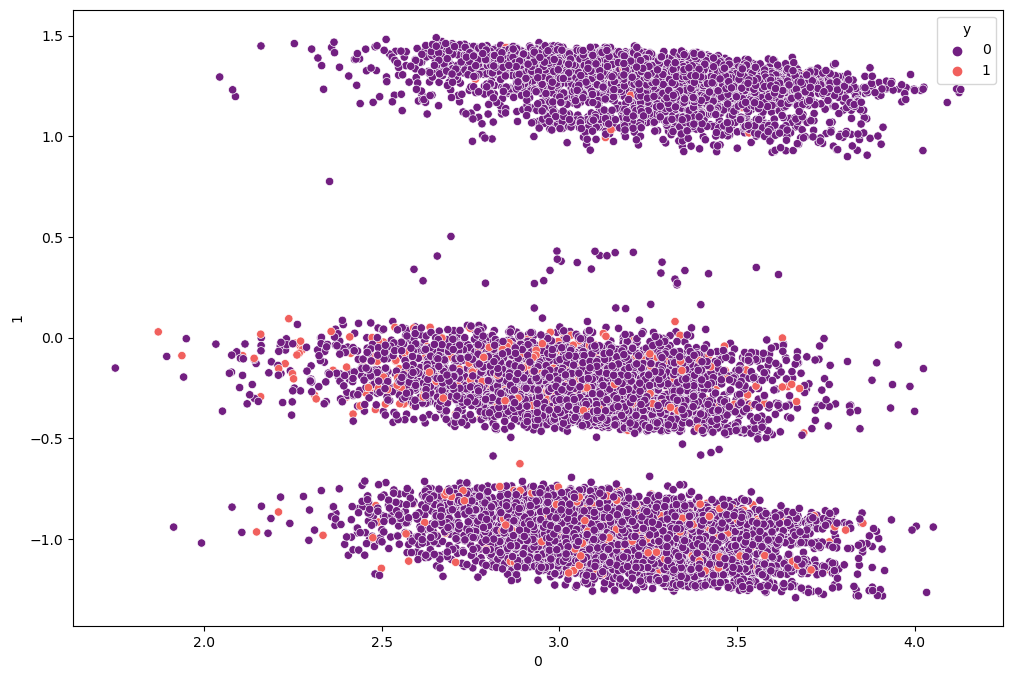

In [52]:
df_vis = pd.DataFrame(df_svd)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

In [53]:
nmf = NMF(n_components=2, random_state = 1)
df_nmf = nmf.fit_transform(X_scaler)

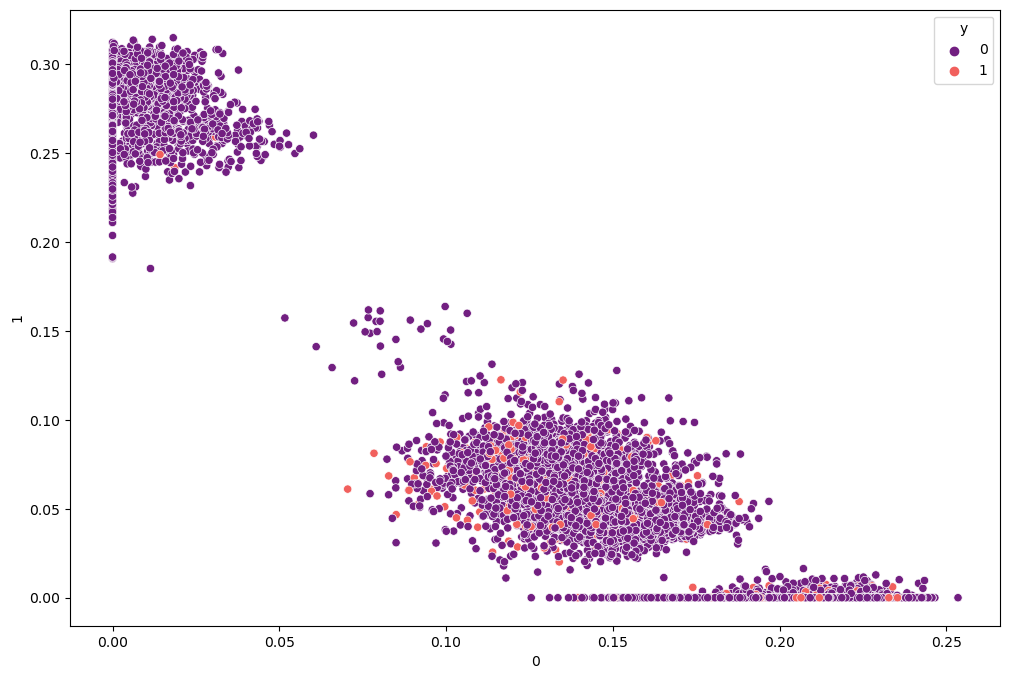

In [54]:
df_vis = pd.DataFrame(df_nmf)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

In [55]:
tsne = TSNE(
    n_components=2, 
    random_state = 1,
    n_iter = 1000,
    n_jobs = -1
)
df_tsne = tsne.fit_transform(X_scaler)

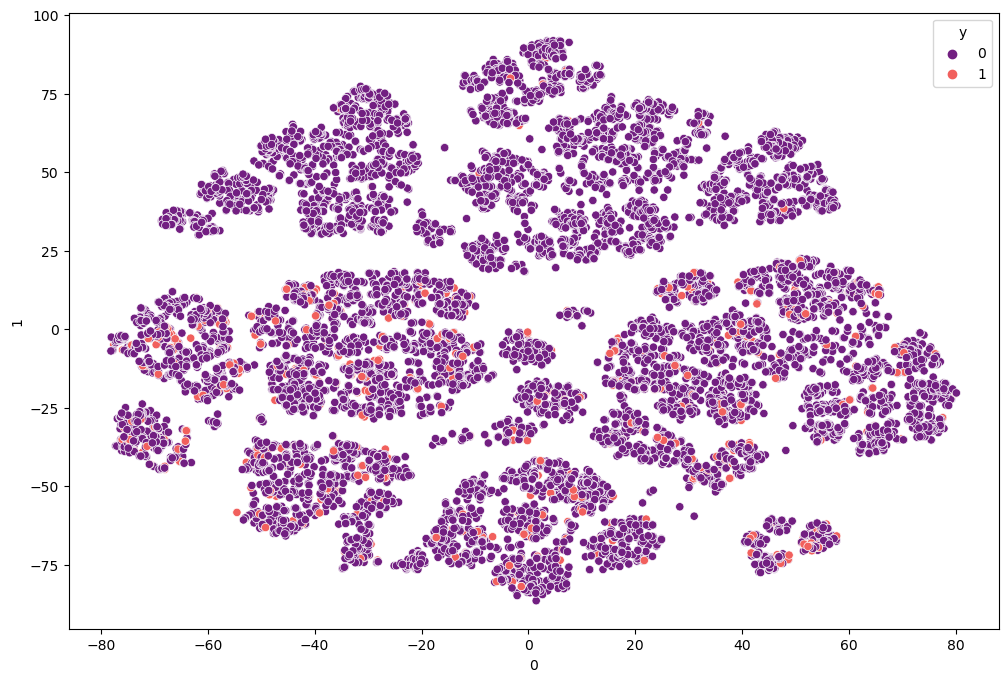

In [56]:
df_vis = pd.DataFrame(df_tsne)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

In [57]:
umap_m = umap.UMAP(
    n_components=2, 
    random_state=1, 
    n_neighbors=5    
)
df_umap = umap_m.fit_transform(X_scaler)

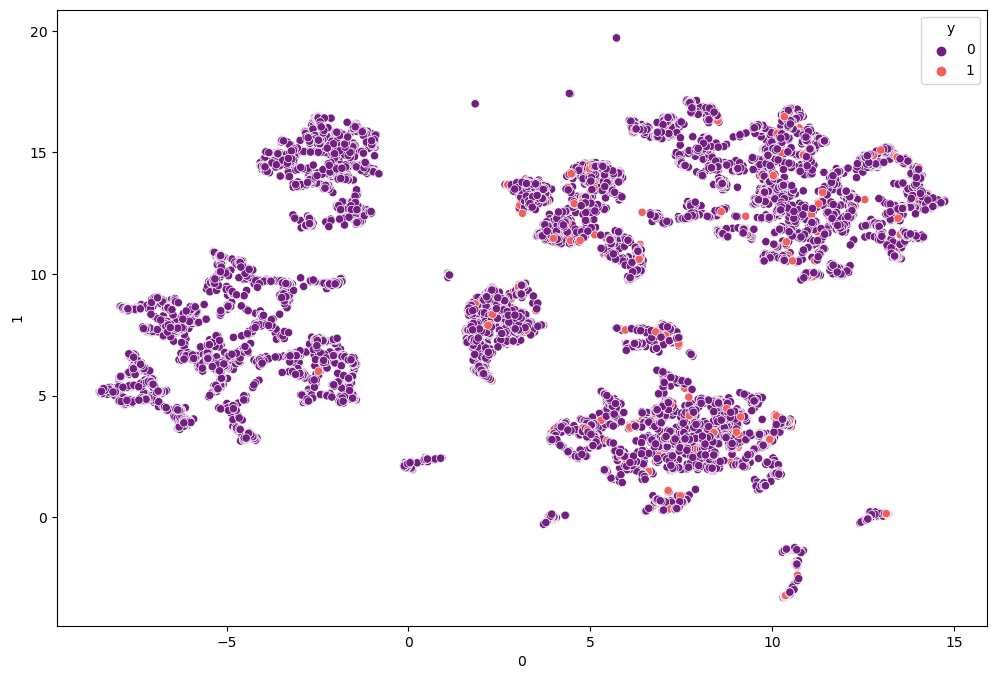

In [58]:
df_vis = pd.DataFrame(df_umap)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

In [59]:
dbscan = DBSCAN(eps = 0.5 , n_jobs = -1)
dbscan.fit(df_umap) 

DBSCAN(n_jobs=-1)

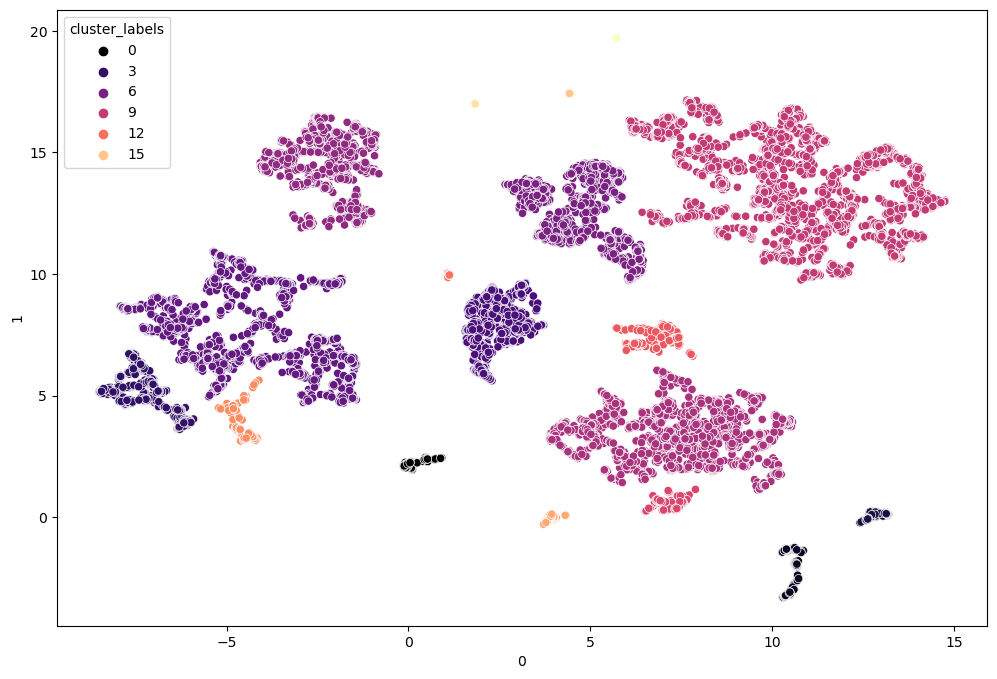

In [60]:
df_vis['cluster_labels'] = dbscan.labels_
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'cluster_labels',  palette = 'magma')
plt.show()

In [61]:
df_c = df_copy
df_c['cluster_labels'] = dbscan.labels_

In [70]:
cluster_pivot = df_c[
    ['cluster_labels', 'ClaimSize', 'AgeOfVehicle', 'Age', 
      'Month', 'dum: WitnessPresent: Yes', 'FraudFound_P', 'PolicyNumber']
    ].groupby(
    by='cluster_labels', 
    as_index=False
).agg({
    'ClaimSize'                 :'mean', 
    'AgeOfVehicle'              :'mean', 
    'Age'                       :'mean', 
    'Month'                     :'mean', 
    'dum: WitnessPresent: Yes'  :'mean', 
    'FraudFound_P'              :'mean',
    'PolicyNumber'             : 'count'
})

cluster_pivot.columns = [
    'Cluster','Mean ClaimSize', 'Mean AgeOfVehicle', 
    'Mean Age', 'Mean Month', 'WitnessPresent rate', 
    'Fraud rate', '# claims'
]

cluster_pivot = cluster_pivot.apply(lambda x: round(x, 2))
cluster_pivot.sort_values(by = 'Fraud rate', ascending = False)

,Cluster,Mean ClaimSize,Mean AgeOfVehicle,Mean Age,Mean Month,WitnessPresent rate,Fraud rate,# claims
17,17,68504.54,6.55,37.70,8.10,0.00,0.30,10
2,2,66861.34,7.02,44.88,6.41,0.01,0.17,104
14,14,7458.20,7.30,44.72,6.08,0.00,0.16,79
10,10,16299.37,7.07,43.64,6.37,0.01,0.13,122
15,15,66419.45,7.03,48.00,6.59,0.00,0.12,17
4,4,20076.81,5.56,30.76,6.17,0.01,0.12,833
11,11,62362.07,7.44,45.63,6.61,0.01,0.12,242
1,1,67226.49,5.58,30.61,6.26,0.03,0.10,158
8,8,17700.76,7.28,45.74,6.31,0.01,0.09,2025
9,9,18192.14,7.11,42.50,6.63,0.01,0.07,2968


In [71]:
df[df_c['cluster_labels'] == 17]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
1487,Jan,1,Monday,Accura,Urban,Wednesday,Jan,3,Male,Single,26.0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,1961,15,400,2.0,more than 30,more than 30,none,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,All Perils,77167.223246
1599,Aug,2,Friday,Accura,Urban,Tuesday,Sep,1,Male,Single,35.0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,2116,13,400,2.0,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,All Perils,89129.755188
2655,Jan,3,Sunday,Accura,Urban,Monday,Jan,5,Male,Single,45.0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,3532,4,400,3.0,more than 30,more than 30,none,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,All Perils,52464.399179
4522,Aug,1,Tuesday,Accura,Urban,Friday,Aug,2,Male,Single,26.0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,6044,16,400,1.0,more than 30,more than 30,none,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,All Perils,53404.029702
5872,Nov,2,Tuesday,Chevrolet,Rural,Tuesday,Nov,3,Male,Single,29.0,Policy Holder,Utility - All Perils,Utility,more than 69000,1,7822,2,400,2.0,more than 30,more than 30,none,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,All Perils,67116.258800
6507,Dec,3,Monday,Accura,Urban,Wednesday,Dec,5,Male,Single,36.0,Policy Holder,Utility - All Perils,Utility,more than 69000,1,8692,14,400,1.0,more than 30,more than 30,none,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1995,All Perils,80258.158579
6894,Nov,2,Monday,Accura,Urban,Tuesday,Nov,3,Male,Single,47.0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,9206,8,400,1.0,more than 30,more than 30,none,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1995,All Perils,74391.153047
8051,Sep,2,Friday,Accura,Urban,Tuesday,Sep,2,Male,Single,29.0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,10745,12,400,4.0,more than 30,more than 30,none,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,All Perils,79417.328822
10737,Aug,5,Wednesday,Accura,Urban,Friday,Sep,4,Male,Single,41.0,Policy Holder,Utility - All Perils,Utility,more than 69000,1,14336,5,400,4.0,more than 30,more than 30,1,6 years,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils,50754.804030
11070,Dec,2,Tuesday,Accura,Urban,Wednesday,Dec,3,Male,Single,63.0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,14759,5,400,2.0,more than 30,more than 30,none,more than 7,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1996,All Perils,60942.271246


In [86]:
data, validation_df  = train_test_split(df_copy,
                                test_size=0.3,
                                random_state = 101)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('FraudFound_P', axis = 1), 
                                                    data['FraudFound_P'], 
                                                    test_size=0.3, 
                                                    random_state=101)

In [88]:
def eval_result(model, X_test, y_test, validation = False):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        pred = model.predict(X_test)
        print(classification_report(y_test, pred, target_names = ['Not Fraud', 'Fraud']))
        display(pd.DataFrame(confusion_matrix(y_test, pred), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))
        
        if hasattr(model, 'feature_importances_') and not validation:
            features = pd.DataFrame({
                'Variable'  :X_test.columns,
                'Importance':model.feature_importances_
            })
            features.sort_values('Importance', ascending=False, inplace=True)
            display(features.head(20))

### Logistic Regression

In [78]:
lgmodel = LogisticRegression(
    solver='lbfgs', 
    class_weight={0:1.0, 1:9.5},
    n_jobs = -1,
    random_state = 101
)
lgmodel.fit(X_train, y_train)
eval_result(lgmodel, X_test, y_test)

              precision    recall  f1-score   support

   Not Fraud       0.94      0.92      0.93      2277
       Fraud       0.09      0.12      0.10       152

    accuracy                           0.87      2429
   macro avg       0.51      0.52      0.52      2429
weighted avg       0.89      0.87      0.88      2429



,Predicted Not Fraud,Predicted Fraud
Not Fraud,2093,184
Fraud,134,18


### Decision Tree

In [77]:
dtc = DecisionTreeClassifier(random_state = 101)
dtc.fit(X_train, y_train)
eval_result(dtc, X_test, y_test)

              precision    recall  f1-score   support

   Not Fraud       0.95      0.95      0.95      2277
       Fraud       0.31      0.31      0.31       152

    accuracy                           0.91      2429
   macro avg       0.63      0.63      0.63      2429
weighted avg       0.91      0.91      0.91      2429



,Predicted Not Fraud,Predicted Fraud
Not Fraud,2174,103
Fraud,105,47


,Variable,Importance
65,PolicyNumber,0.227782
71,DayOfWeek,0.059024
72,ClaimSize,0.053176
67,Month,0.052460
66,MonthClaimed,0.049636
62,WeekOfMonth,0.049356
64,RepNumber,0.042918
70,DayOfWeekClaimed,0.042671
75,Age,0.040988
44,dum: Fault: Third Party,0.034311


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
rfr = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_depth' : [5, 10, 15],
    'bootstrap': [True]
}

cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 200]})

In [90]:
rfc1=RandomForestClassifier(n_estimators= 50, max_depth=15, bootstrap=True, random_state=42)

rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)

### Random Forest

In [91]:
y_pred = rfc1.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.9374228077398106
Confusion matrix:
 [[2277    0]
 [ 152    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2277
           1       0.00      0.00      0.00       152

    accuracy                           0.94      2429
   macro avg       0.47      0.50      0.48      2429
weighted avg       0.88      0.94      0.91      2429



### Evaluation of models

In [92]:
models = [
    ("Logistic Regression", LogisticRegression(), {}),
    ("Random Forest", RandomForestClassifier(), {}),
    ("Decision Tree", DecisionTreeClassifier(), {}),
]

best_model = None
best_accuracy = 0

In [94]:
from sklearn.model_selection import RandomizedSearchCV

for name, model, params in models:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=params,
                                       scoring='accuracy', n_iter=3, cv=3, random_state=45)
    random_search.fit(X_train, y_train)
    accuracy = random_search.best_score_

    print(f"Model: {name}")
    print(f"Best Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model based on Accuracy: {best_model}")

Model: Logistic Regression
Best Accuracy: 0.9428167984136526
Model: Random Forest
Best Accuracy: 0.9428167984136526
Model: Decision Tree
Best Accuracy: 0.9071666958274638

Best Model based on Accuracy: LogisticRegression()


### Model: Logistic Regression